Import Libraries

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

Step 1 - Business Understanding

Mendukung perancangan, implementasi, dan evaluasi program intervensi gizi yang bertujuan untuk meningkatkan kesehatan masyarakat dalam skala lokal maupun nasional.


Step 2 - Data Understanding


In [71]:
# Memuat dataset
df = pd.read_csv('data_balita.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120999 entries, 0 to 120998
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur (bulan)       120999 non-null  int64  
 1   Jenis Kelamin      120999 non-null  object 
 2   Tinggi Badan (cm)  120999 non-null  float64
 3   Status Gizi        120999 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.7+ MB


Pada dataset Stunting Toddler(Balita) memiliki jumlah fitur sebanyak 4 yang terdiri dari Umur(bulan), Jenis Kelamin, Tinggi Badan(cm), dan Status Gizi. Pada fitur Jenis kelamin dan Status gizi dapat diubah menjadi tipe data string di tahap Data Preparations

In [72]:
# Menampilkan jumlah data dan beberapa baris pertama dari dataset
print(len(df))
print(df.head())

120999
   Umur (bulan) Jenis Kelamin  Tinggi Badan (cm)       Status Gizi
0             0     laki-laki          44.591973           stunted
1             0     laki-laki          56.705203            tinggi
2             0     laki-laki          46.863358            normal
3             0     laki-laki          47.508026            normal
4             0     laki-laki          42.743494  severely stunted


In [73]:
# Menampilkan kolom Umur (bulan) setelah pengolahan data
print(df['Umur (bulan)'])

0          0
1          0
2          0
3          0
4          0
          ..
120994    60
120995    60
120996    60
120997    60
120998    60
Name: Umur (bulan), Length: 120999, dtype: int64


In [74]:
# Menampilkan kolom Jenis Kelamin setelah pengolahan data
print(df['Jenis Kelamin'])

0         laki-laki
1         laki-laki
2         laki-laki
3         laki-laki
4         laki-laki
            ...    
120994    perempuan
120995    perempuan
120996    perempuan
120997    perempuan
120998    perempuan
Name: Jenis Kelamin, Length: 120999, dtype: object


In [75]:
# Menampilkan kolom Tinggi Badan setelah pengolahan data
print(df['Tinggi Badan (cm)'])

0          44.591973
1          56.705203
2          46.863358
3          47.508026
4          42.743494
             ...    
120994    100.600000
120995     98.300000
120996    121.300000
120997    112.200000
120998    109.800000
Name: Tinggi Badan (cm), Length: 120999, dtype: float64


In [76]:
# Menghitung jumlah setiap kategori dalam kolom Status Gizi
category_counts = df['Status Gizi'].value_counts()
category_counts

Status Gizi
normal              67755
severely stunted    19869
tinggi              19560
stunted             13815
Name: count, dtype: int64

Step 3 - Data Preparation

In [77]:
#Check missing value
df.isnull().sum()

Umur (bulan)         0
Jenis Kelamin        0
Tinggi Badan (cm)    0
Status Gizi          0
dtype: int64

Pada dataset yang digunakan, tidak terdapat missing value. Sehingga tidak perlu masuk ke tahap data cleaning.

In [78]:
# Mengganti nilai nol dengan NaN dan mengisi nilai NaN dengan rata-rata
zero_not_accepted = ['Umur (bulan)', 'Tinggi Badan (cm)']
for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

In [79]:
# Melakukan encoding pada variabel kategori
df['Jenis Kelamin'] = df['Jenis Kelamin'].map({'laki-laki': 0, 'perempuan': 1})
df['Status Gizi'] = df['Status Gizi'].map({'severely stunted': 0, 'stunted': 1, 'normal': 2, 'tinggi': 3})

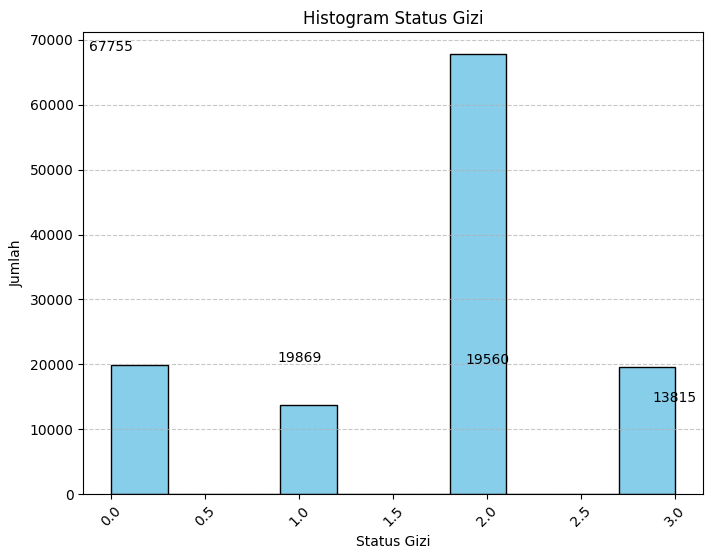

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.hist(df['Status Gizi'], color='skyblue', edgecolor='black')
plt.title('Histogram Status Gizi')
plt.xlabel('Status Gizi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)  # Memutar label untuk legibilitas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan angka di atas tiap batang
counts = df['Status Gizi'].value_counts()
for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.show()


C:\Users\jovit\AppData\Local\Temp\ipykernel_1332\3614512238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='Jenis Kelamin', palette='pastel')


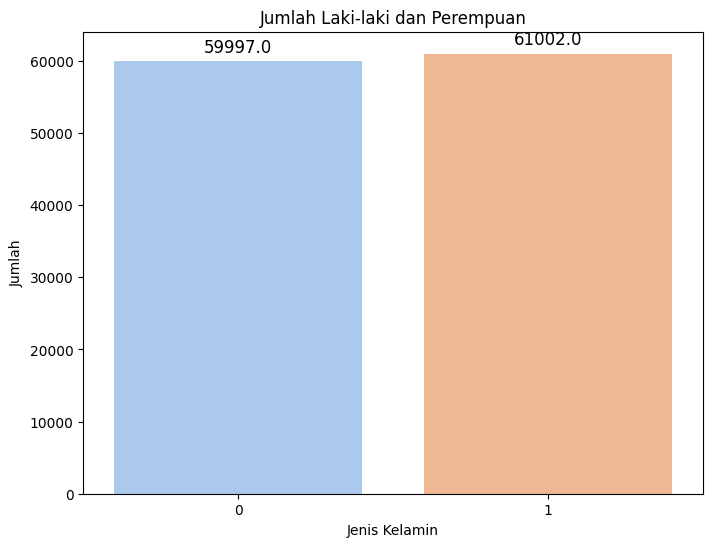

In [81]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Jenis Kelamin', palette='pastel')

# Menambahkan angka di atas tiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Jumlah Laki-laki dan Perempuan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.show()


Split Data
Pembagian data (data splitting) adalah proses memisahkan satu set data menjadi dua subset yang berbeda. Biasanya, ini dilakukan dalam konteks pembelajaran mesin untuk melatih dan menguji model. Pembagian data menjadi dua bagian utama: set pelatihan (training set) dan set pengujian (testing set).

Set Pelatihan (Training Set): Ini adalah bagian dari data yang digunakan untuk melatih model. Model belajar dari pola dalam set pelatihan dan berusaha untuk menyesuaikan diri dengan data ini.

Set Pengujian (Testing Set): Ini adalah bagian dari data yang tidak digunakan selama proses pelatihan. Set pengujian digunakan untuk menguji sejauh mana model yang telah dilatih dapat melakukan prediksi yang akurat pada data yang belum pernah dilihat sebelumnya.

Tujuan utama dari pembagian data adalah untuk mengukur kinerja model pada data yang tidak digunakan selama pelatihan. Ini membantu mengidentifikasi apakah model cenderung mengalami overfitting (menyesuaikan terlalu baik dengan data pelatihan, tetapi tidak generalis di data baru) atau underfitting (gagal menangkap pola di dalam data pelatihan). Proses ini sering kali melibatkan penggunaan fungsi seperti train_test_split dari pustaka scikit-learn untuk memecah data dengan cara yang acak dan proporsional antara set pelatihan dan pengujian.

In [82]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi fitur dan target
X = df.iloc[:, 1:6]
X = df.drop('Status Gizi', axis=1)
y = df['Status Gizi']

# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X_train

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
21452,11.0,0,64.00000
25283,13.0,0,79.60000
30909,15.0,1,67.80000
64536,32.0,1,85.30000
68658,34.0,1,79.00000
...,...,...,...
110268,55.0,1,97.20000
119879,60.0,0,124.90000
103694,52.0,0,92.10000
860,30.0,0,49.73505


In [84]:
X_test

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
17917,8.0,1,70.1
6976,3.0,0,65.4
37592,19.0,0,72.9
89657,45.0,0,89.1
117023,59.0,0,94.0
...,...,...,...
109271,55.0,0,98.0
95988,48.0,0,102.5
74058,37.0,1,88.7
27022,14.0,0,77.4


In [85]:
y_train

21452     0
25283     2
30909     0
64536     2
68658     0
         ..
110268    1
119879    3
103694    0
860       2
15795     2
Name: Status Gizi, Length: 96799, dtype: int64

In [86]:
y_test

17917     2
6976      2
37592     0
89657     0
117023    0
         ..
109271    1
95988     2
74058     2
27022     2
102529    0
Name: Status Gizi, Length: 24200, dtype: int64

In [87]:
len(X_test)

24200

In [88]:
len(X_train)

96799

In [89]:
len(y_train)

96799

In [90]:
len(y_test)

24200

In [91]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [92]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [93]:
X_train


,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
21452,11.0,0,64.00000
25283,13.0,0,79.60000
30909,15.0,1,67.80000
64536,32.0,1,85.30000
68658,34.0,1,79.00000
...,...,...,...
110268,55.0,1,97.20000
119879,60.0,0,124.90000
103694,52.0,0,92.10000
860,30.0,0,49.73505


In [94]:
X_test

,Umur (bulan),Jenis Kelamin,Tinggi Badan (cm)
17917,8.0,1,70.1
6976,3.0,0,65.4
37592,19.0,0,72.9
89657,45.0,0,89.1
117023,59.0,0,94.0
...,...,...,...
109271,55.0,0,98.0
95988,48.0,0,102.5
74058,37.0,1,88.7
27022,14.0,0,77.4


Step 4 - Modeling

In [95]:
# Inisialisasi dan melatih model KNN
k = 1 
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=1)

In [96]:
y_test

17917     2
6976      2
37592     0
89657     0
117023    0
         ..
109271    1
95988     2
74058     2
27022     2
102529    0
Name: Status Gizi, Length: 24200, dtype: int64

In [97]:
y_train

21452     0
25283     2
30909     0
64536     2
68658     0
         ..
110268    1
119879    3
103694    0
860       2
15795     2
Name: Status Gizi, Length: 96799, dtype: int64

In [98]:
# Import library yang diperlukan untuk menghitung akurasi
from sklearn.metrics import accuracy_score

# Melakukan prediksi menggunakan data uji yang telah diskalakan
y_pred = knn.predict(X_test_scaled)

# Menilai akurasi model
accuracy = accuracy_score(y_test, y_pred)
# Mencetak akurasi model untuk dinilai secara langsung
print('Akurasi model KNN:', accuracy)


Akurasi model KNN: 0.9990495867768595


In [99]:
# Import library yang diperlukan untuk laporan klasifikasi dan matriks kebingungan (confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix

# Menampilkan (confusion matrix)
print('Confusion Matrix:')
# Mencetak matriks confusion yang menggambarkan performa model dalam klasifikasi
# Matriks confusion menunjukkan jumlah prediksi yang benar dan salah untuk setiap kelas
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 4129     1     0     0]
 [    6  2782     2     0]
 [    0     3 13372     7]
 [    0     0     4  3894]]


In [100]:
# Menampilkan laporan klasifikasi (classification report)
print('Classification Report:')
# classification_report menerima label target dan prediksi sebagai inputnya
# Kita perlu mengubah bentuk label target menjadi array 1 dimensi
# karena classification_report mengharapkan input dalam bentuk tersebut
print(classification_report(y_test.values.reshape(-1, 1), y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      2790
           2       1.00      1.00      1.00     13382
           3       1.00      1.00      1.00      3898

    accuracy                           1.00     24200
   macro avg       1.00      1.00      1.00     24200
weighted avg       1.00      1.00      1.00     24200



In [101]:
# Import library untuk validasi silang (cross-validation)
from sklearn.model_selection import cross_val_score

# Melakukan validasi silang (cross-validation)
print('Cross Validation Score:') 
cv_scores = cross_val_score(knn, scaler.transform(X), y, cv=5)  # Melakukan validasi silang dengan 5 lipatan (fold)
print(cv_scores) 
print('Akurasi rata-rata:', np.mean(cv_scores))  # Menampilkan akurasi rata-rata dari hasil validasi silang


Cross Validation Score:
[0.38801653 0.44198347 0.52256198 0.59971074 0.66444894]
Akurasi rata-rata: 0.5233443342887949


In [102]:
# Data baru untuk diprediksi
new_data = pd.DataFrame({'Umur (bulan)': [20], 'Jenis Kelamin': [0], 'Tinggi Badan (cm)': [100.2]})

# Skalakan data baru sesuai dengan scaler yang sudah dilatih sebelumnya
new_data_scaled = scaler.transform(new_data)

# Lakukan prediksi menggunakan model KNN yang sudah dilatih
prediction = knn.predict(new_data_scaled)

# Map hasil prediksi ke label kategori yang sesuai
status_gizi_labels = {0: 'severely stunted', 1: 'stunted', 2: 'normal', 3: 'tinggi'}
predicted_status = status_gizi_labels[prediction[0]]  # Ambil prediksi pertama dari array hasil

# Tampilkan hasil prediksi dalam bentuk label kategori
print("Predicted Status Gizi:", predicted_status)


Predicted Status Gizi: tinggi


Step 5 - Deployment

In [103]:
# Ekspor model yang telah dilatih
from joblib import dump

# Diasumsikan 'knn' adalah model KNN yang sudah dilatih
dump(knn, 'model.joblib')

In [104]:
# # Simpan DataFrame ke dalam file CSV tanpa menyertakan indeks
# df.to_csv('trained_data.csv', index=False)